# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2023-01-01,2023-7-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
#Pengambilan data tabel dari website
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt15398776">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt15398776/">
    <img alt="Oppenheimer" class="loadlate" data-tconst="tt15398776" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDBmYTZjNjUtN2M1MS00MTQ2LTk2ODgtNzc2M2QyZGE5NTVjXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_UX67_CR0,0,67


In [5]:
#Pengambilan data row tabel
table.find_all('div', attrs={'class':'lister-item mode-advanced'})[:1]

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt15398776"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt15398776/"> <img alt="Oppenheimer" class="loadlate" data-tconst="tt15398776" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDBmYTZjNjUtN2M1MS00MTQ2LTk2ODgtNzc2M2QyZGE5NTVjXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt15398776/">Oppenheimer</a>
 <span class="lister-item-year text-muted unbold">(2023)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">13+</span>
 <span class="ghost">|</span>
 <span class="runtime">180 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Biog

Finding row length.

In [6]:
#Pengecekan jumlah row total
row = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
row_length = len(row)
row_length

50

Scraping process

In [7]:
temp = [] #init
items = soup.find_all('div', class_='lister-item-content')
for item in items:
    
    #Pengambilan title film
    title = item.find('h3', class_='lister-item-header').a.text
        
    #Pengambilan data kolom IMDB Rating & Pengolahan     
    imdb_rating_a = item.find('div', class_='ratings-bar')
    imdb_rating = imdb_rating_a.strong.text if imdb_rating_a and imdb_rating_a.strong else 'N/A'
        
    #Pengambilan data kolom Metascore & Pengolahan       
    metascore_a = item.find('div', class_='inline-block ratings-metascore')
    metascore = metascore_a.text.strip() if metascore_a else '0'
    metascore = metascore.replace("\n", "")
    metascore = metascore.replace("Metascore", "") 
        
    #Pengambilan data kolom Vote & Pengolahan   
    votes_a = item.find('span', attrs={'name': 'nv'})
    votes = votes_a['data-value'] if votes_a and 'data-value' in votes_a.attrs else 'N/A'

    
    temp.append((title, imdb_rating, metascore, votes))
    print(temp)

   


[('Oppenheimer', '8.6', '88                ', '408764')]
[('Oppenheimer', '8.6', '88                ', '408764'), ('Barbie', '7.3', '80                ', '271655')]
[('Oppenheimer', '8.6', '88                ', '408764'), ('Barbie', '7.3', '80                ', '271655'), ('No Hard Feelings', '6.4', '59                ', '59849')]
[('Oppenheimer', '8.6', '88                ', '408764'), ('Barbie', '7.3', '80                ', '271655'), ('No Hard Feelings', '6.4', '59                ', '59849'), ('Special Ops: Lioness', '7.7', '0', '12453')]
[('Oppenheimer', '8.6', '88                ', '408764'), ('Barbie', '7.3', '80                ', '271655'), ('No Hard Feelings', '6.4', '59                ', '59849'), ('Special Ops: Lioness', '7.7', '0', '12453'), ('Guardians of the Galaxy Vol. 3', '8.0', '64                ', '305319')]
[('Oppenheimer', '8.6', '88                ', '408764'), ('Barbie', '7.3', '80                ', '271655'), ('No Hard Feelings', '6.4', '59                ', '598

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
#Import file menjadi pandas
import pandas as pd

df = pd.DataFrame(temp, columns = ('Title','IMDB Rating', 'Metascore', 'Votes'))

#Pengambilan top 7 film di IMDB
dftop = df.head(7)
dftop

,Title,IMDB Rating,Metascore,Votes
0,Oppenheimer,8.6,88,408764
1,Barbie,7.3,80,271655
2,No Hard Feelings,6.4,59,59849
3,Special Ops: Lioness,7.7,0,12453
4,Guardians of the Galaxy Vol. 3,8.0,64,305319
5,Meg 2: The Trench,5.2,40,34248
6,Gran Turismo,7.4,47,18176


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
# checking data types
dftop.dtypes

Title          object
IMDB Rating    object
Metascore      object
Votes          object
dtype: object

In [10]:
#Penggantian astype IMDB Rating menjadi 'float64'
dftop['IMDB Rating'] = dftop['IMDB Rating'].astype('float64')

C:\Users\user\AppData\Local\Temp\ipykernel_19672\3537414400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop['IMDB Rating'] = dftop['IMDB Rating'].astype('float64')


In [11]:
#Penggantian astype Votes menjadi 'int64'
dftop[['Votes', 'Metascore']] = dftop[['Votes', 'Metascore']].astype('int64')

C:\Users\user\AppData\Local\Temp\ipykernel_19672\2224782549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop[['Votes', 'Metascore']] = dftop[['Votes', 'Metascore']].astype('int64')


In [12]:
#Pembuatan tabel set_index('title') untuk mempersiapkan visualisasi
titleindex = dftop.set_index('Title')
titleindex

,IMDB Rating,Metascore,Votes
Title,,,
Oppenheimer,8.6,88,408764
Barbie,7.3,80,271655
No Hard Feelings,6.4,59,59849
Special Ops: Lioness,7.7,0,12453
Guardians of the Galaxy Vol. 3,8.0,64,305319
Meg 2: The Trench,5.2,40,34248
Gran Turismo,7.4,47,18176


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

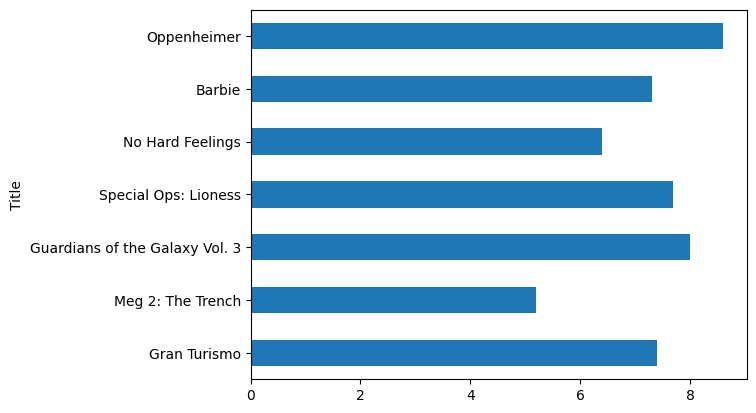

In [17]:
# Visualisasi data Top 7 menurut IMDB Rating
titleindex['IMDB Rating'].plot(kind = 'barh').invert_yaxis()

Menurut data di atas, dari *top 7 movie* yang direlease pada periode diantara 2023-01-01 dan 2023-07-31, Oppenheimer merupakan film yang mendapatkan rating tertinggi. Sedangkan, Meg 2: the Trench merupakan film top 7 yang mendapatkan rating terendah. 

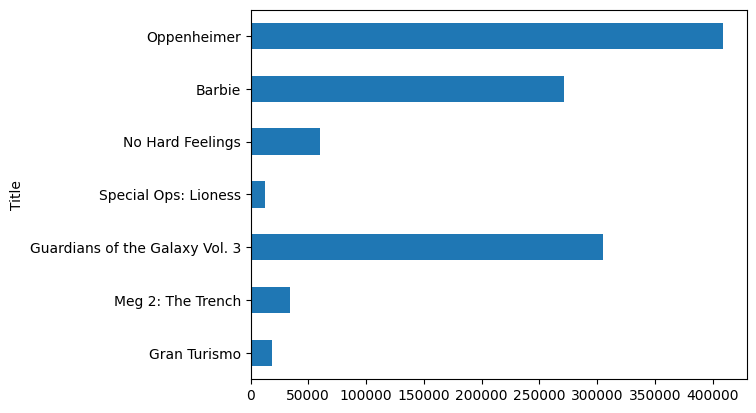

In [14]:
# Visualisasi data Top 7 menurut vote score
titleindex['Votes'].plot(kind = 'barh').invert_yaxis()

Menurut data di atas, dari *top 7 movie* yang direlease pada periode diantara 2023-01-01 dan 2023-07-31, Oppenheimer merupakan film yang mendapatkan votes tertinggi hingga melebihi 400000 vote dan diikuti oleh Guardians of the Galaxy Vol.3 dan Barbie. Sedangkan, Special Ops: Lioness memiliki vote terendah diantara ketujuh film tersebut.

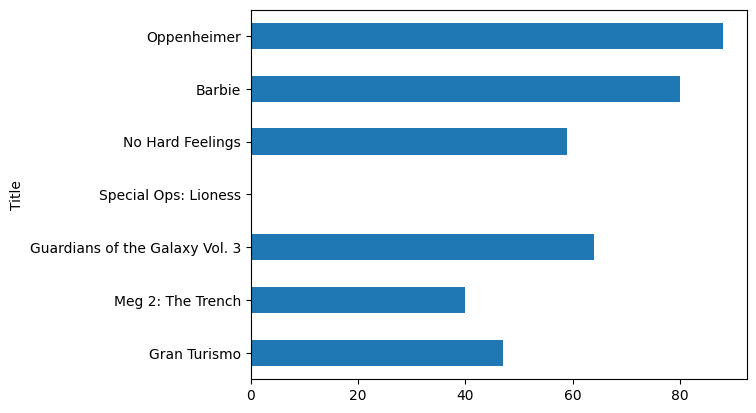

In [15]:
# Visualisasi data Top 7 menurut Metascore
titleindex['Metascore'].plot(kind = 'barh').invert_yaxis()

Menurut data di atas, dari *top 7 movie* yang direlease pada periode diantara 2023-01-01 dan 2023-07-31,hanya 6 dari 7 film yang memiliki Metascore. Oppenheimer memiliki metascore tertinggi dan diikuti oleh film Barbie dan Guardians of the Galaxy Vol 3. Sedangkan, Meg 2: The Trench memiliki metascore terendah dan film Special Ops: Lioness tidak memiliki metascore

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.